In [ ]:
# ==============================
# 02_eda_sensor_behavior.ipynb
# ==============================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




In [2]:

train = pd.read_csv(r"D:\projects\aviation\dataset\clean_train_data.csv")

sensor_cols = [c for c in train.columns if c.startswith("s")]

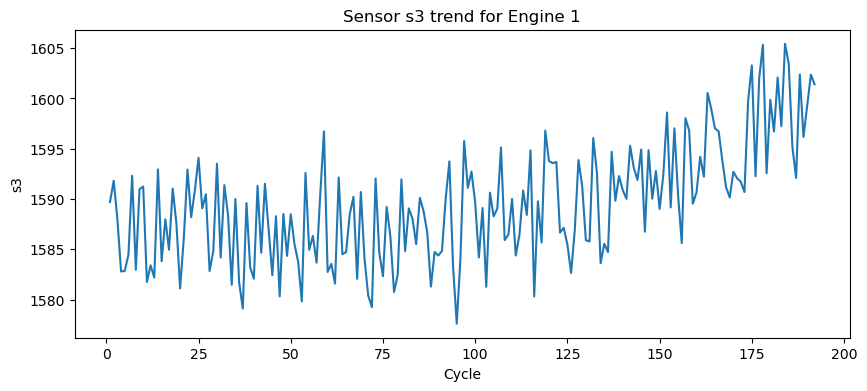

In [3]:
engine_id = 1
subset = train[train["id"] == engine_id]

plt.figure(figsize=(10,4))
plt.plot(subset["cycle"], subset["s3"])
plt.title("Sensor s3 trend for Engine 1")
plt.xlabel("Cycle")
plt.ylabel("s3")
plt.show()


In [7]:
train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,max_cycle_x,RUL,max_cycle_y
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100,39.06,23.4190,192,191,192
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100,39.00,23.4236,192,190,192
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100,38.95,23.3442,192,189,192
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,8.3682,0.03,392,2388,100,38.88,23.3739,192,188,192
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,8.4294,0.03,393,2388,100,38.90,23.4044,192,187,192


In [9]:
from sklearn.metrics import f1_score

results =[]

for w in [10,20,30,40,50]:
    train['near_failure'] = train['RUL']<=w
    score = train['near_failure'].mean()
    results.append((w,score))

results

[(10, 0.05331782269400417),
 (20, 0.10178857059764432),
 (30, 0.15025931850128446),
 (40, 0.19873006640492463),
 (50, 0.24720081430856478)]

In [11]:
train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s16,s17,s18,s19,s20,s21,max_cycle_x,RUL,max_cycle_y,near_failure
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,0.03,392,2388,100,39.06,23.4190,192,191,192,False
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,0.03,392,2388,100,39.00,23.4236,192,190,192,False
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,0.03,390,2388,100,38.95,23.3442,192,189,192,False
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,0.03,392,2388,100,38.88,23.3739,192,188,192,False
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,0.03,393,2388,100,38.90,23.4044,192,187,192,False


In [13]:

train["life_frac"] = train["RUL"] / train.groupby("id")["RUL"].transform("max")

train["near_failure_practical"] = train["life_frac"] <= 0.10


In [15]:
train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s18,s19,s20,s21,max_cycle_x,RUL,max_cycle_y,near_failure,life_frac,near_failure_practical
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,2388,100,39.06,23.4190,192,191,192,False,1.000000,False
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,2388,100,39.00,23.4236,192,190,192,False,0.994764,False
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,2388,100,38.95,23.3442,192,189,192,False,0.989529,False
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,2388,100,38.88,23.3739,192,188,192,False,0.984293,False
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,2388,100,38.90,23.4044,192,187,192,False,0.979058,False


In [19]:
failure_window = 30

train["near_failure"] = train["RUL"] <= failure_window

train.groupby("near_failure")[sensor_cols].mean().T.head(10)


near_failure,False,True
setting1,-0.000019,0.000046
setting2,0.000001,0.000009
setting3,100.000000,100.000000
s1,518.670000,518.670000
s2,642.558680,643.372297
s3,1589.074474,1598.715435
s4,1406.479717,1422.811913
s5,14.620000,14.620000
s6,21.609768,21.610000
s7,553.600545,552.050997


In [25]:
mean_diff = (
    train.groupby("near_failure")[sensor_cols].mean()
    .diff()
    .iloc[-1]
    .abs()
    .sort_values(ascending=False)
)

mean_diff.head(10)


s9     25.927076
s14    18.207540
s4     16.332196
s3      9.640961
s17     2.527136
s7      1.549549
s12     1.321347
s2      0.813617
s11     0.497540
s20     0.303447
Name: True, dtype: float64

In [35]:
corr = train [sensor_cols + ['RUL']].corr()["RUL"].sort_values()

corr.head()

s11   -0.696228
s4    -0.678948
s15   -0.642667
s2    -0.606484
s17   -0.606154
Name: RUL, dtype: float64

In [45]:
important_sensors = corr.head(8).index.tolist()

In [47]:

pd.Series(important_sensors).to_csv(
    r"D:\projects\aviation\dataset\important_sensors.csv", index=False
)